In [1]:
from pycaret.classification import *
import pandas as pd

In [3]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
classification_setup = setup(data= train, target='Survived',
                             remove_outliers=True, normalize=True,
                            ignore_features= ['Name',"PassengerId"], silent = True,
                             session_id = 42,
                             transformation=True,
                             fix_imbalance=True,use_gpu=True)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8410,0.8572,0.6974,0.8330,0.7556,0.6395,0.6479,0.9300
ridge,Ridge Classifier,0.8360,0.0000,0.7452,0.7804,0.7601,0.6359,0.6383,0.0900
svm,SVM - Linear Kernel,0.8292,0.0000,0.7395,0.7761,0.7518,0.6224,0.6277,0.0920
lightgbm,Light Gradient Boosting Machine,0.8275,0.8681,0.7550,0.7569,0.7536,0.6212,0.6235,0.1810
et,Extra Trees Classifier,0.8242,0.8500,0.6588,0.8097,0.7245,0.5978,0.6061,0.9290
dt,Decision Tree Classifier,0.8241,0.7884,0.6683,0.8028,0.7275,0.5996,0.6066,0.0990
gbc,Gradient Boosting Classifier,0.8224,0.8516,0.7214,0.7618,0.7407,0.6058,0.6066,0.4190
lda,Linear Discriminant Analysis,0.8224,0.8501,0.7455,0.7579,0.7484,0.6118,0.6146,0.2560
lr,Logistic Regression,0.8140,0.8502,0.7595,0.7270,0.7421,0.5967,0.5979,0.1120
ada,Ada Boost Classifier,0.7936,0.8347,0.7167,0.6997,0.7060,0.5475,0.5493,0.2220


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [8]:
ridge  = create_model('ridge')
lgbm   = create_model('lightgbm')
svm = create_model("svm")
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8167,0.7796,0.7143,0.7500,0.7317,0.5926,0.5930
1,0.7458,0.8295,0.6500,0.6190,0.6341,0.4395,0.4398
2,0.9153,0.9179,0.8000,0.9412,0.8649,0.8037,0.8094
3,0.8814,0.9073,0.8095,0.8500,0.8293,0.7384,0.7390
4,0.8814,0.8741,0.6667,1.0000,0.8000,0.7204,0.7503
5,0.8136,0.7080,0.5714,0.8571,0.6857,0.5606,0.5839
6,0.8136,0.8528,0.6190,0.8125,0.7027,0.5705,0.5817
7,0.7797,0.9029,0.6190,0.7222,0.6667,0.5036,0.5069
8,0.8475,0.8390,0.7143,0.8333,0.7692,0.6563,0.6607
9,0.9153,0.9605,0.8095,0.9444,0.8718,0.8091,0.8144


In [9]:
blender = blend_models(estimator_list=[ridge,lgbm,svm,rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.0000,0.6667,0.7368,0.7000,0.5506,0.5521
1,0.7797,0.0000,0.6000,0.7059,0.6486,0.4897,0.4931
2,0.9322,0.0000,0.8500,0.9444,0.8947,0.8449,0.8475
3,0.8814,0.0000,0.7619,0.8889,0.8205,0.7327,0.7375
4,0.8814,0.0000,0.7143,0.9375,0.8108,0.7267,0.7409
5,0.8136,0.0000,0.5238,0.9167,0.6667,0.5502,0.5918
6,0.8305,0.0000,0.6667,0.8235,0.7368,0.6139,0.6213
7,0.8644,0.0000,0.7143,0.8824,0.7895,0.6911,0.6995
8,0.8475,0.0000,0.7619,0.8000,0.7805,0.6637,0.6642
9,0.9322,0.0000,0.8571,0.9474,0.9000,0.8489,0.8513


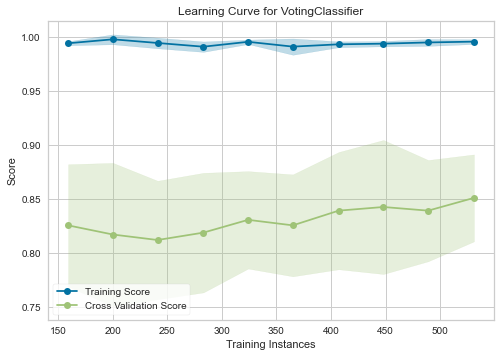

In [10]:
plot_model(estimator = blender, plot = 'learning')

In [11]:
tuned_ridge = tune_model(ridge, n_iter = 250)
tuned_lgbm = tune_model(lgbm, n_iter = 250)
tuned_svm = tune_model(svm, n_iter = 250)
tuned_rf = tune_model(rf, n_iter = 250)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8500,0.7985,0.7143,0.8333,0.7692,0.6591,0.6634
1,0.8136,0.8391,0.6500,0.7647,0.7027,0.5682,0.5722
2,0.8814,0.9474,0.7000,0.9333,0.8000,0.7181,0.7331
3,0.8644,0.8972,0.7619,0.8421,0.8000,0.6978,0.6998
4,0.7966,0.8283,0.6190,0.7647,0.6842,0.5366,0.5432
5,0.7966,0.7462,0.5238,0.8462,0.6471,0.5151,0.5443
6,0.8305,0.8459,0.7143,0.7895,0.7500,0.6223,0.6241
7,0.8475,0.9079,0.7619,0.8000,0.7805,0.6637,0.6642
8,0.8305,0.8283,0.7143,0.7895,0.7500,0.6223,0.6241
9,0.8983,0.9361,0.7619,0.9412,0.8421,0.7683,0.7777


In [12]:
opt_blender = blend_models(estimator_list=[tuned_ridge,tuned_lgbm,tuned_svm,tuned_rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.0000,0.6667,0.7368,0.7000,0.5506,0.5521
1,0.8136,0.0000,0.6500,0.7647,0.7027,0.5682,0.5722
2,0.8983,0.0000,0.7500,0.9375,0.8333,0.7615,0.7713
3,0.8644,0.0000,0.7619,0.8421,0.8000,0.6978,0.6998
4,0.8305,0.0000,0.6667,0.8235,0.7368,0.6139,0.6213
5,0.7966,0.0000,0.5238,0.8462,0.6471,0.5151,0.5443
6,0.8305,0.0000,0.6667,0.8235,0.7368,0.6139,0.6213
7,0.8305,0.0000,0.6190,0.8667,0.7222,0.6051,0.6228
8,0.8305,0.0000,0.7143,0.7895,0.7500,0.6223,0.6241
9,0.9492,0.0000,0.9048,0.9500,0.9268,0.8879,0.8885


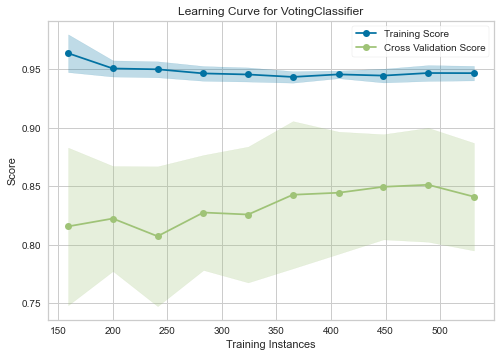

In [13]:
plot_model(estimator = opt_blender, plot = 'learning')

In [15]:
submission = pd.read_csv('./titanic/gender_submission.csv')

In [16]:
predict = predict_model(opt_blender, data=test)
predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [17]:
submission['Survived'] = predict.Label
submission.to_csv('submission1.csv',index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
